In [1]:
import numpy as np
import tensorflow as tf
import tensorboard as tb
from tensorflow import keras
from sklearn.model_selection import train_test_split
import datetime

In [2]:
np.random.seed(42)

# تعداد نمونه‌ها و ویژگی‌ها
number_dates = 10000
input_feature = 15
input_feature = 3
output_feature = 1

# داده‌های ورودی
X = np.random.rand(number_dates, input_feature).astype(np.float32)

# ایجاد رابطه خطی بین X و Y با نویز
weights_ = np.array([2.0, -3.5, 1.0]).astype(np.float32)  # وزن‌های دلخواه
bias_ = 5.0  # بایاس
noise_ = np.random.normal(0, 0.1, size=(number_dates,)).astype(np.float32)  # نویز

# محاسبه Y با رابطه خطی
Y = (X @ weights_.reshape(-1, 1) + bias_ + noise_.reshape(-1, 1)).astype(np.float32)

In [3]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=32,test_size=0.2)

In [4]:
X_train_1, X_validaion, y_train_1, y_validaion = train_test_split(
                                                                 X_train,
                                                                 Y_train)

In [5]:
input_=keras.layers.Input(X_train_1.shape[1:])

hidden_layer_1=keras.layers.Dense(100,activation='relu')(input_)
hidden_layer_2=keras.layers.Dense(150,activation='relu')(hidden_layer_1)
hidden_layer_3=keras.layers.Dense(75,activation='relu')(hidden_layer_2)

output_=keras.layers.Dense(1)(hidden_layer_3)

model_reg=keras.Model(inputs=input_,outputs=output_,name="regression_model")

In [6]:
model_reg.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

## callback

In [7]:
model_Checkpoint_callback = keras.callbacks.ModelCheckpoint('model_regresion_p1.h5'
                                                            ,save_best_only=True)

In [8]:
earlystopping_callback_ = keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=6,
                                                      restore_best_weights=True)

In [9]:
# مسیر ذخیره لاگ‌ها
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

## fit

In [10]:
history = model_reg.fit(
    x=X_train_1,
    y=y_train_1,
    epochs=100,
    batch_size=35,
    validation_data=(X_validaion, y_validaion),
        callbacks=[model_Checkpoint_callback,
               earlystopping_callback_,
                tensorboard_callback
              ]
)

Epoch 1/100
172/172 [==============================] - 1s 2ms/step - loss: 0.7235 - mean_absolute_error: 0.3862 - val_loss: 0.0111 - val_mean_absolute_error: 0.0847
Epoch 2/100
122/172 [====================>.........] - ETA: 0s - loss: 0.0122 - mean_absolute_error: 0.0884

D:\anacoda\envs\a.i\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


172/172 [==============================] - 0s 1ms/step - loss: 0.0123 - mean_absolute_error: 0.0884 - val_loss: 0.0114 - val_mean_absolute_error: 0.0858
Epoch 3/100
172/172 [==============================] - 0s 1ms/step - loss: 0.0127 - mean_absolute_error: 0.0900 - val_loss: 0.0113 - val_mean_absolute_error: 0.0852
Epoch 4/100
172/172 [==============================] - 0s 1ms/step - loss: 0.0125 - mean_absolute_error: 0.0890 - val_loss: 0.0117 - val_mean_absolute_error: 0.0859
Epoch 5/100
172/172 [==============================] - 0s 1ms/step - loss: 0.0157 - mean_absolute_error: 0.0989 - val_loss: 0.0226 - val_mean_absolute_error: 0.1238
Epoch 6/100
172/172 [==============================] - 0s 1ms/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0112 - val_mean_absolute_error: 0.0852
Epoch 7/100
172/172 [==============================] - 0s 1ms/step - loss: 0.0125 - mean_absolute_error: 0.0890 - val_loss: 0.0106 - val_mean_absolute_error: 0.0820
Epoch 8/100
172/172 [=

## evaluate

In [11]:
# ارزیابی مدل
test_loss, test_mae = model_reg.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")


Test Loss (MSE): 0.010380505584180355
Test Mean Absolute Error (MAE): 0.08154017478227615


In [12]:
# پیش‌بینی روی داده‌های تست
y_pred = model_reg.predict(X_test)

# نمایش چند نمونه از مقادیر واقعی و پیش‌بینی‌شده
for i in range(5):
    print(f"Actual: {Y_test[i]}, Predicted: {y_pred[i]}")


63/63 [==============================] - 0s 852us/step
Actual: [4.7478204], Predicted: [4.91477]
Actual: [6.3260946], Predicted: [6.4038734]
Actual: [4.967318], Predicted: [4.753159]
Actual: [2.7396567], Predicted: [2.6539526]
Actual: [3.858327], Predicted: [3.834468]


In [14]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.10188477486371994


In [15]:
from sklearn.metrics import r2_score  # ایمپورت r2_score

# پیش‌بینی مقادیر توسط مدل
y_pred = model_reg.predict(X_test)

# محاسبه R² Score
r2 = r2_score(Y_test, y_pred)

# چاپ R² Score
print(f"R² Score: {r2}")


63/63 [==============================] - 0s 933us/step
R² Score: 0.9929919925408142


## plot evaluate

الف. مقایسه مقادیر واقعی و پیش‌بینی‌شده

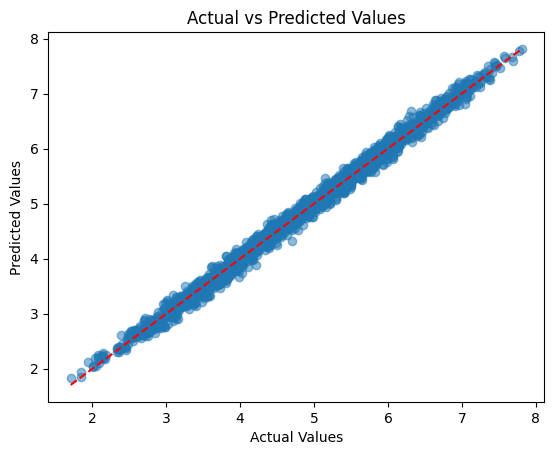

In [16]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


ب. توزیع خطاها

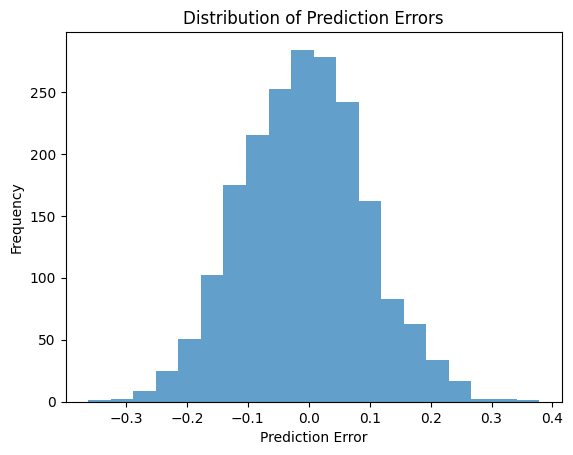

In [17]:
errors = Y_test - y_pred
plt.hist(errors, bins=20, alpha=0.7)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


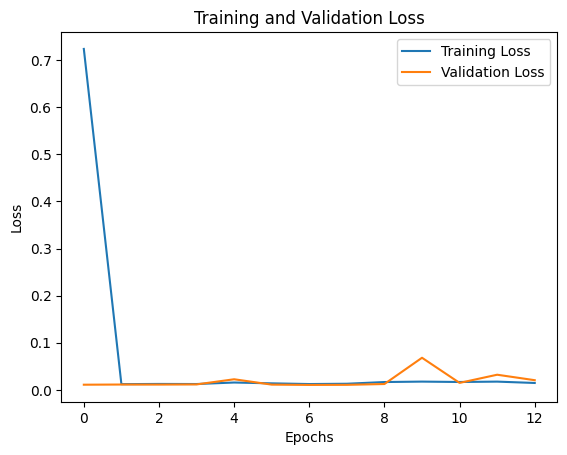

In [18]:
# رسم نمودار Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


In [19]:

# محاسبه خطاها
errors = np.abs(Y_test - y_pred)

# یافتن نمونه‌هایی با بیشترین خطا
largest_errors_indices = np.argsort(errors)[-5:]  # 5 نمونه با بیشترین خطا
for i in largest_errors_indices:
    print(f"Actual: {Y_test[i]}, Predicted: {y_pred[i]}, Error: {errors[i]}")


Actual: [[4.7478204]], Predicted: [[4.91477]], Error: [[0.16694975]]
Actual: [[4.7478204]], Predicted: [[4.91477]], Error: [[0.16694975]]
Actual: [[4.7478204]], Predicted: [[4.91477]], Error: [[0.16694975]]
Actual: [[4.7478204]], Predicted: [[4.91477]], Error: [[0.16694975]]
Actual: [[4.7478204]], Predicted: [[4.91477]], Error: [[0.16694975]]


In [20]:
for layer in model_reg.layers:
    weights = layer.get_weights()  # دریافت وزن‌ها و بایاس‌ها
    if len(weights) > 0:  # بررسی اینکه آیا لایه وزنی دارد
        weights, biases = weights  # باز کردن وزن‌ها و بایاس‌ها
        print(f"Weights: {weights}, Biases: {biases}")
    else:
        print(f"Layer {layer.name} has no trainable weights.")


Layer input_1 has no trainable weights.
Weights: [[ 6.80414364e-02 -1.53464228e-01  1.50288060e-01 -2.16391191e-01
   7.41588464e-03  2.17265487e-01 -7.55265355e-04  1.99511200e-02
  -2.16678560e-01 -2.42847607e-01 -6.67995512e-02 -2.60681599e-01
  -2.21028224e-01 -4.60616685e-02 -1.57826707e-01  7.96295926e-02
  -2.62860805e-02 -1.11179268e-02 -9.52117890e-02  2.87443260e-03
   1.10922180e-01 -2.09292158e-01  5.25926724e-02 -1.55223444e-01
   8.68828744e-02 -6.57357275e-02  4.16874550e-02 -6.83963299e-03
  -2.87463695e-01 -2.12085605e-01 -1.63628936e-01  1.89534485e-01
  -1.19264505e-03 -1.98543757e-01 -2.64622003e-01 -2.98326433e-01
  -1.90524846e-01 -3.63142416e-02  5.32810986e-02  5.14139198e-02
   1.47287771e-01 -6.61312267e-02  2.15099305e-01  1.92955621e-02
  -5.07494994e-02  5.20876348e-02  1.73121363e-01 -2.69967020e-02
   4.73749079e-02 -1.52016461e-01 -3.95061827e-04 -9.19125136e-03
  -1.78719744e-01  7.33235702e-02 -1.73508406e-01 -1.80140212e-01
   8.55622962e-02 -1.073246

In [21]:
model_reg.save('model_regresion_p1', save_format='tf')

INFO:tensorflow:Assets written to: model_regresion_p1\assets


INFO:tensorflow:Assets written to: model_regresion_p1\assets


In [28]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [29]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 17952), started 0:35:39 ago. (Use '!kill 17952' to kill it.)